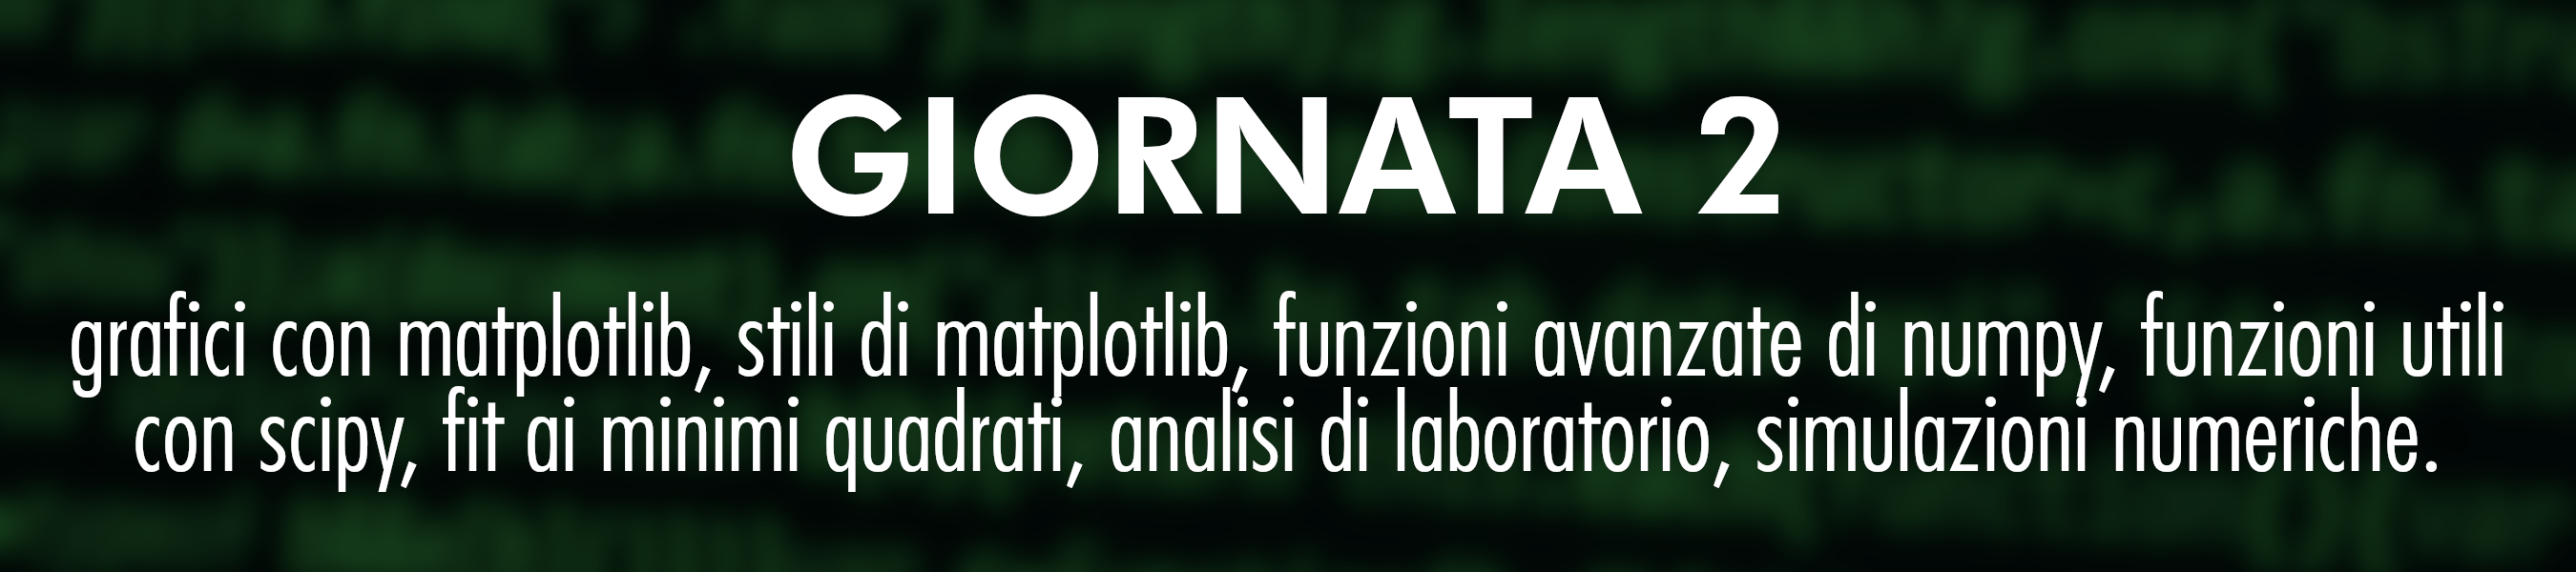

**Disclaimer!** Il materiale presente è fornito per il corso _"Python: Un Approccio Da Fisico"_ tenuto a _Maggio 2023_ per _AISF_ da _Alessandro Romancino_. Il materiale, distribuito con _licenza MIT_ è reperibile presso https://github.com/alex180500/aisf-corso-python.

# Introduzione a Matplotlib

[**Matplotlib**](https://matplotlib.org/stable/index.html) è la libreria di visualizzazione dati per eccellenza. Per approcciarla si possono usare [due interfacce](https://matplotlib.org/stable/users/explain/api_interfaces.html), quella _esplicita_, anche chiamata **Axes** che usa funzioni sugli oggetti `Axes`, oppure l'interfaccia _implicita_, o **pyplot**, che useremo per questo corso. [Clicca qui per più informazioni.](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()

Per iniziare creiamo un semplice grafico di una funzione, inizializziamo un array di punti e applichiamo una funzione, questi saranno la nostra _x_ e la _y_, per generare segmenti tra tutti questi punti usiamo `plt.plot()`. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

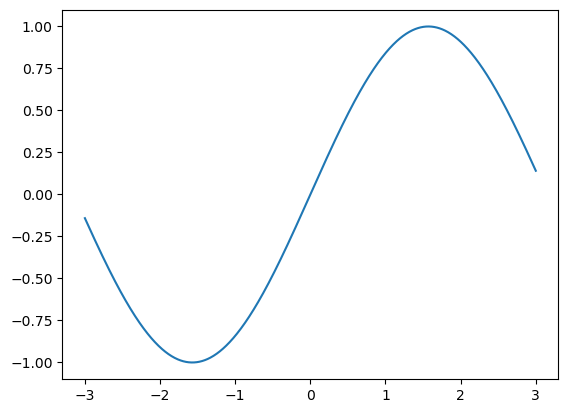

In [3]:
x = np.linspace(-3, 3, 1000)
y = np.sin(x)

plt.plot(x, y)

Per modificare lo stile dei grafici si usano molti _kwargs_. I più importanti sono _c_ (colore), _lw_ (linewidth o spessore), _ls_ (linestyle o stile) e _s_ (size o grandezza del marker) e _marker_ (tipo di marker) per `plt.scatter()`. [Clicca qui per più informazioni](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

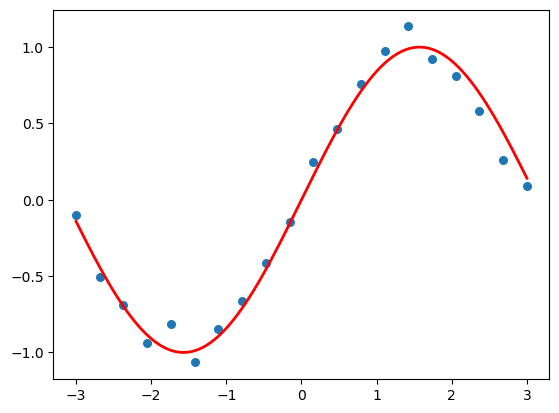

In [4]:
x_scat = np.linspace(-3, 3, 20)
y_scat = np.sin(x_scat) + rng.normal(scale=0.1, size=x_scat.size)

plt.plot(x, y, c="red", lw=2)
plt.scatter(x_scat, y_scat, s=30)

Qualsiasi parte della _figure_ può essere modificata, però molto spesso è conveniente creare uno stile con tutte le proprie modifiche inserite di default. Questo può essere attivato con `plt.style.use()`. Matplotlib è dotato di [alcuni stili preinstallati](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Consiglio vivamente di scaricare gli [stili SciencePlots](https://github.com/garrettj403/SciencePlots) disponibili su GitHub. [Clicca qui per più informazioni.](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

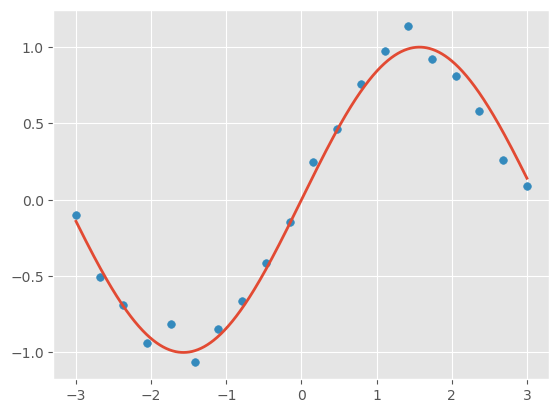

In [5]:
plt.style.use("ggplot")

plt.plot(x, y, c="C0", lw=2)
plt.scatter(x_scat, y_scat, c="C1", s=30)

Un'altra funzione molto comune per l'analisi dati in fisica è `plt.errorbar()` che permette di inserire le barre d'errore. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

In [ ]:
# grafici, errorbar, istogrammi

Per quanto riguarda altre funzioni utili, eccone una carrellata per modificare il grafico...

Per cambiare le proporzioni della figure c'è [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). Per avere una legenda si esplicita il _label_ e poi si attiva con [`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Per settare un asse in scala logaritmica si usa [`plt.xscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) oppure [`plt.yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html). Per settare i limiti manualmente si usano [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) e [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

Per aggiungere titoli agli assi e alla figure si usano [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) e [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), nei titoli si può usare il formattatore in LaTeX. Per salvare la figure invece si usa [`plt.savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) esplicitando il nome del file e la risoluzione con _dpi_.

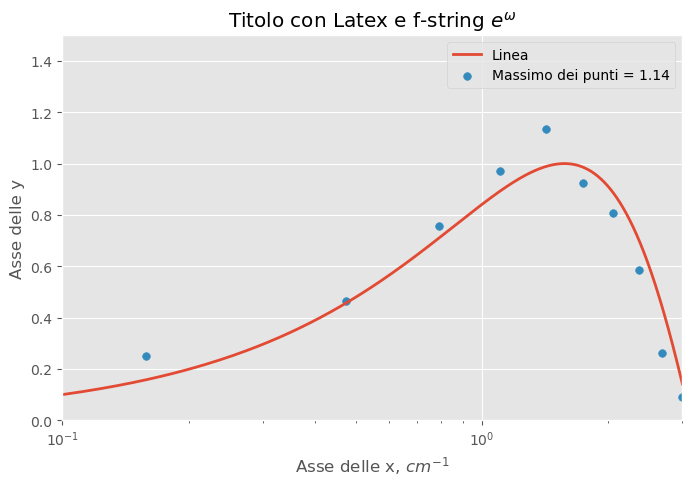

In [32]:
plt.figure(figsize=(8, 5))

plt.plot(x, y, c="C0", lw=2, label="Linea")
plt.scatter(x_scat, y_scat, c="C1", s=30, label=f"Massimo dei punti = {y_scat.max():.2f}")

plt.legend()
plt.xscale("log", base=10)
plt.xlim(1e-1, 3)
plt.ylim(0, 1.5)
plt.xlabel("Asse delle x, $cm^{-1}$")
plt.ylabel("Asse delle y")
plt.title(f"Titolo con Latex e f-string $e^{{\omega}}$")

plt.savefig("images/log-graph.png", dpi=300)

# **Esempio 1:** Generazione Immagine Montecarlo

L'obiettivo è di generare l'immagine utilizzata per l'esempio in Giornata 1.

Per prima cosa generiamo la curva in forma parametrica, per un cerchio la cosa è abbastanza semplice. Basta inizializzare un angolo $\theta$ da $0$ a $2\pi$ e i punti sono identificati da seni e coseni.

In [35]:
theta = np.linspace(0, 2 * np.pi, 1000)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

A questo punto generiamo i punti random come fatto nel primo notebook e usiamo la funzione `np.where()` per selezionare il colore _blue_ se la condizione è _True_ e _red_ se la condizione è _False_. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [36]:
x = rng.uniform(-1, 1, 1000)
y = rng.uniform(-1, 1, 1000)
colors = np.where(x**2 + y**2 < 1, "blue", "red")

Ora importiamo [`patches.Rectangle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) che ci servirà per inserire il quadrato nero. Inoltre torniamo allo stile di _default_.

In [37]:
from matplotlib.patches import Rectangle

plt.style.use("default")

Now we can plot everything! We are using the 

(-1.1, 1.1, -1.1, 1.1)

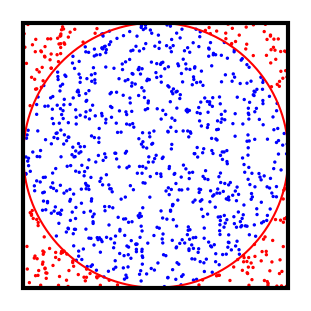

In [39]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")

plt.plot(x_circle, y_circle, lw=1.5, c="red", zorder=2)
plt.scatter(x, y, c=colors, s=2, zorder=1)

rect = Rectangle((-1, -1), 2, 2, lw=3, ec="black", fc="None", zorder=3)
ax.add_patch(rect)

plt.axis("off")
# plt.savefig("images/monte_carlo.png", dpi=100)

# **Esempio 2:** Analisi Dati con Integrale Numerico

# Funzioni Utili con SciPy

[SciPy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) è il coltellino svizzero delle librerie scientifiche in Python. Ha tutto quello che puoi immaginare in modo ottimizzato: [trasformate di Fourier](https://docs.scipy.org/doc/scipy/reference/fft.html), [integrazione numerica e soluzione di ODE](https://docs.scipy.org/doc/scipy/reference/integrate.html), [analisi di segnali e convoluzioni](https://docs.scipy.org/doc/scipy/reference/signal.html), [fit e ottimizzazioni](https://docs.scipy.org/doc/scipy/reference/optimize.html), [algebra lineare avanzata](https://docs.scipy.org/doc/scipy/reference/linalg.html) e perfino una routine per le [sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html). Imparare qualche funzione di questa libreria è sicuramente utile. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/tutorial/general.html)

In [49]:
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.integrate import simpson

find peaks https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

In [ ]:
x, y = np.loadtxt('data/dati_blackbody.txt', delimiter=' ', unpack=True)

peaks, properties = find_peaks(y, height=0.2, width=(None, None))

plt.plot(x, y, zorder=1)
plt.scatter(x[peaks], y[peaks], s=100, c='C1', marker='x', linewidths=4, zorder=2)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html

In [50]:
# integrazione con simpson

Ora ci buttiamo subito nei fit ai minimi quadrati ma prima un **disclaimer**.

Se avete dei dati con errore nella _variabile indipendente_ (o asse delle x) e volete effettuare un fit tenendolo in considerazione allora `scipy.optimize.curve_fit()` non fa più a caso vostro. Dovrete usare un altro metodo di fitting, chiamato [**Total Least Square**](https://en.wikipedia.org/wiki/Total_least_squares) basato sull'ottimizzazione di distanze "ortogonali". Fortunatamente SciPy è dotato di una semplice implementazione, accessibile da `scipy.odr`. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/odr.html)

# **Esempio 3:** Analisi Dati di Laboratorio con Fit

asoduiahsiudhas https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# **Esempio 4:** Simulazione Random Walk

In un **Random Walk** unidimensionale una particella ad ogni istante temporale sceglie se muoversi a destra o sinistra a passi discreti (movimenti di $-1$ o $+1$). L'obiettivo è quello di trovare una _time series_ cioè la posizione della particella in funzione del tempo. Se si studiano le time series di un insieme di particelle indipendenti si trova che la **varianza** della serie temporale aumenta linearmente con il tempo.

In [4]:
time = 1_000_000

single_walk = rng.choice([-1, 1], time)
single_walk

array([-1,  1, -1, ..., -1, -1,  1])

In [5]:
# %%timeit
tot_dist = 0
dist = []
for el in single_walk:
    tot_dist += el
    dist.append(tot_dist)

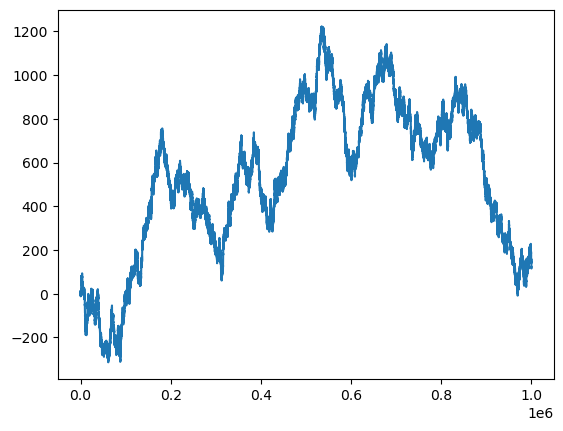

In [6]:
plt.plot(dist)

In [7]:
single_walk.cumsum()

array([ -1,   0,  -1, ..., 122, 121, 122])

In [8]:
# check if the array are equal at every time step!
(single_walk.cumsum() == dist).all()

True

In [21]:
time = 1000
n_rep = 100

all_choices = rng.choice([-1, 1], (n_rep, time))

In [22]:
walks = np.cumsum(all_choices, axis=1)
walks

array([[ -1,   0,   1, ...,  44,  45,  46],
       [  1,   2,   3, ...,  12,  11,  12],
       [ -1,   0,  -1, ...,  -4,  -5,  -4],
       ...,
       [  1,   2,   1, ...,  12,  13,  14],
       [  1,   0,   1, ..., -16, -17, -18],
       [  1,   0,   1, ..., -26, -27, -26]])

(0.0, 1000.0)

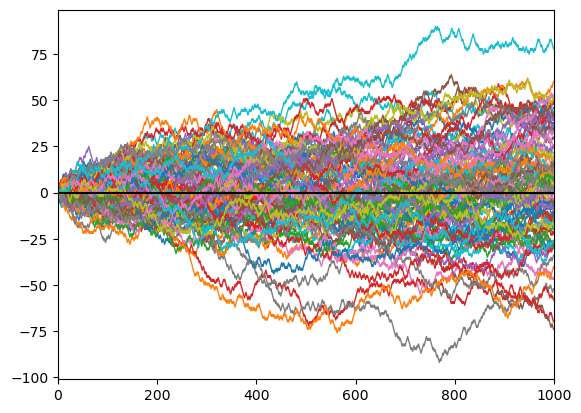

In [23]:
for w in walks:
    plt.plot(w, lw=1)
plt.axhline(0, c="k")
plt.xlim(0, time)

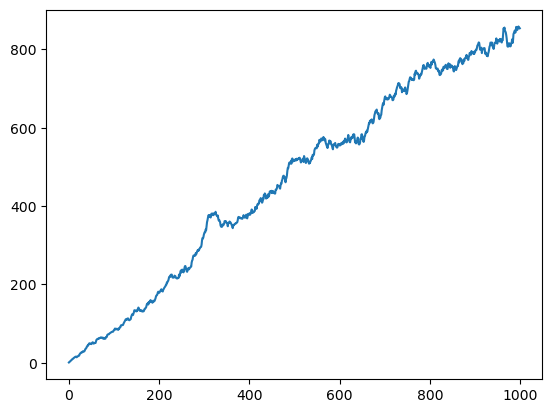

In [25]:
t = np.arange(time)
var = np.var(walks, axis=0)

plt.plot(t, var)

In [38]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, t, var)
err = np.sqrt(np.diag(pcov))
print(my_val := f"a = {popt[0]:.4f} ± {err[0]:.4f}\nb = {popt[1]:.2f} ± {err[1]:.2f}")

a = 0.8828 ± 0.0033
b = 23.27 ± 1.90


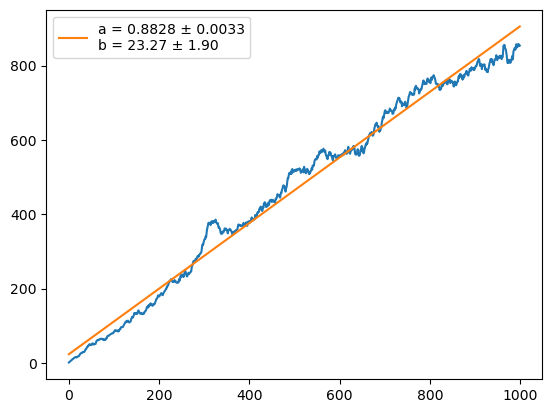

In [39]:
plt.plot(t, var)
plt.plot(t, linear(t, *popt), label=my_val)
plt.legend()